In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten
from keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split

train = pd.read_csv("train.csv")
print(train.shape)
train.head()

Using TensorFlow backend.


(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
test = pd.read_csv("test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from keras.utils.np_utils import to_categorical

X_train = train.values[:, 1:].reshape(train.shape[0], 28, 28, 1).astype('float32')
y_train = to_categorical(train.values[:, 0]).astype('int32')
X_test = test.values.reshape(test.shape[0], 28, 28, 1).astype('float32')

X_train.shape, y_train.shape, X_test.shape

((42000, 28, 28, 1), (42000, 10), (28000, 28, 28, 1))

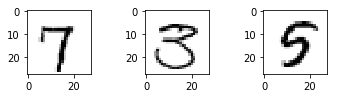

In [4]:
for i in range(6, 9):
    plt.subplot(325 + i)
    plt.imshow(255 - X_train[i].reshape(28, 28), 'gray')

In [5]:
def standardize(x):
    mean_px = X_train.mean().astype('float32')
    std_px = X_train.std().astype('float32')
    return (x - mean_px) / std_px

In [6]:
from keras.models import  Sequential
from keras.layers.core import Lambda, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D, MaxPooling2D

model = Sequential()

# First layer, simple arithmetic operations
model.add(Lambda(standardize, input_shape=(28, 28, 1)))

# Second layer, flatten will transform input into 1D array
model.add(Flatten())

# Third layer, Dense is a fully connected layer
model.add(Dense(10, activation='softmax'))

print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

input shape  (None, 28, 28, 1)
output shape  (None, 10)


In [7]:
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=.001), loss='categorical_crossentropy', metrics=['accuracy'])

from keras.preprocessing import image
gen = image.ImageDataGenerator()

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.1)

batches = gen.flow(X_train, y_train, batch_size=64)
val_batches = gen.flow(X_val, y_val, batch_size=64)
history = model.fit_generator(batches, batches.n, nb_epoch=1,
                              validation_data=val_batches, nb_val_samples=val_batches.n)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., 37800, validation_data=<keras.pre..., epochs=1, validation_steps=4200)`
  del sys.path[0]


Epoch 1/1
37800/37800 [==============================] - 319s - loss: 0.2398 - acc: 0.9337 - val_loss: 0.3249 - val_acc: 0.9196


In [8]:
predictions = model.predict_classes(X_test)
sub = pd.DataFrame({"ImageId": np.arange(len(predictions)) + 1, "Label": predictions})
sub.to_csv("sub.csv", index=False)

27744/28000 [============================>.] - ETA: 0s